<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [ ]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.shape

### Convert to date time object


In [1]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

NameError: name 'pd' is not defined

# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [ ]:
df['loan_status'].value_counts()

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

## Convert Categorical features to numerical values


Let's look at gender:


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

## One Hot Encoding

#### How about education?


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

#### Features before One Hot Encoding


In [ ]:
df[['Principal','terms','age','Gender','education']].head()

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


### Feature Selection


Let's define feature sets, X:


In [ ]:
X = Feature
X[0:5]

What are our lables?


In [ ]:
y = df['loan_status'].values
y[0:5]

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


Best accuracy  0.75 with k =  9


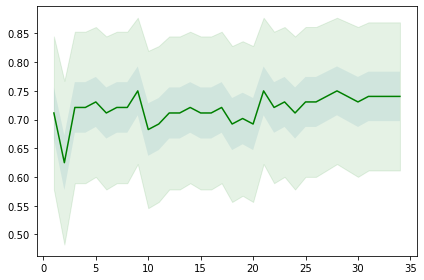

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

path = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"

df = pd.read_csv(path)

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature
Y = df['loan_status'].values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 4, test_size = 0.3)

ks = 35
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for i in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    pred = neigh.predict(X_test)
    mean_acc[i-1] = accuracy_score(Y_test,pred)
    std_acc[i-1] = np.std(Y_test==pred)/np.sqrt(pred.shape[0])
    
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc + 1*std_acc,mean_acc - 1*std_acc,alpha=0.10)
plt.fill_between(range(1,ks),mean_acc + 3*std_acc,mean_acc - 3*std_acc,alpha=0.10,color="green")
plt.tight_layout()
    
print("Best accuracy ",mean_acc.max(),"with k = ",mean_acc.argmax()+1)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score,f1_score

path = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"

df = pd.read_csv(path)

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature
Y = df['loan_status'].values

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 4, test_size = 0.3)

k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
pred = neigh.predict(X_test)

print("Jaccard Score 'COLLECTION' :",jaccard_score(Y_test,pred,pos_label='COLLECTION'))
print("Jaccard Score 'PAIDOFF'    :",jaccard_score(Y_test,pred,pos_label='PAIDOFF'))
print("F1 Score 'COLLECTION'      :",f1_score(Y_test,pred,pos_label='COLLECTION'))
print("F1 Score 'PAIDOFF'         :",f1_score(Y_test,pred,pos_label='PAIDOFF'))

Jaccard Score 'COLLECTION' : 0.2571428571428571
Jaccard Score 'PAIDOFF'    : 0.7263157894736842
F1 Score 'COLLECTION'      : 0.409090909090909
F1 Score 'PAIDOFF'         : 0.8414634146341463


# Decision Tree


Jaccard Score 'COLLECTION' : 0.2857142857142857
Jaccard Score 'PAIDOFF'    : 0.6739130434782609
F1 Score 'COLLECTION'      : 0.4444444444444444
F1 Score 'PAIDOFF'         : 0.8051948051948051

Open Tree in new tab to view more clearly :)


[Text(1063.86328125, 3180.06, 'X[4] <= -0.188\nentropy = 0.801\nsamples = 242\nvalue = [59, 183]'),
 Text(270.0, 3016.98, 'X[7] <= 0.14\nentropy = 0.14\nsamples = 101\nvalue = [2, 99]'),
 Text(216.0, 2853.9, 'entropy = 0.0\nsamples = 62\nvalue = [0, 62]'),
 Text(324.0, 2853.9, 'X[2] <= -0.57\nentropy = 0.292\nsamples = 39\nvalue = [2, 37]'),
 Text(270.0, 2690.8199999999997, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(378.0, 2690.8199999999997, 'X[3] <= 0.979\nentropy = 0.414\nsamples = 24\nvalue = [2, 22]'),
 Text(324.0, 2527.74, 'X[2] <= 1.42\nentropy = 0.485\nsamples = 19\nvalue = [2, 17]'),
 Text(270.0, 2364.66, 'X[2] <= 1.254\nentropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(162.0, 2201.58, 'X[2] <= -0.404\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(108.0, 2038.5, 'X[0] <= -0.399\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(54.0, 1875.42, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(162.0, 1875.42, 'entropy = 0.918\nsamples = 3\nvalu

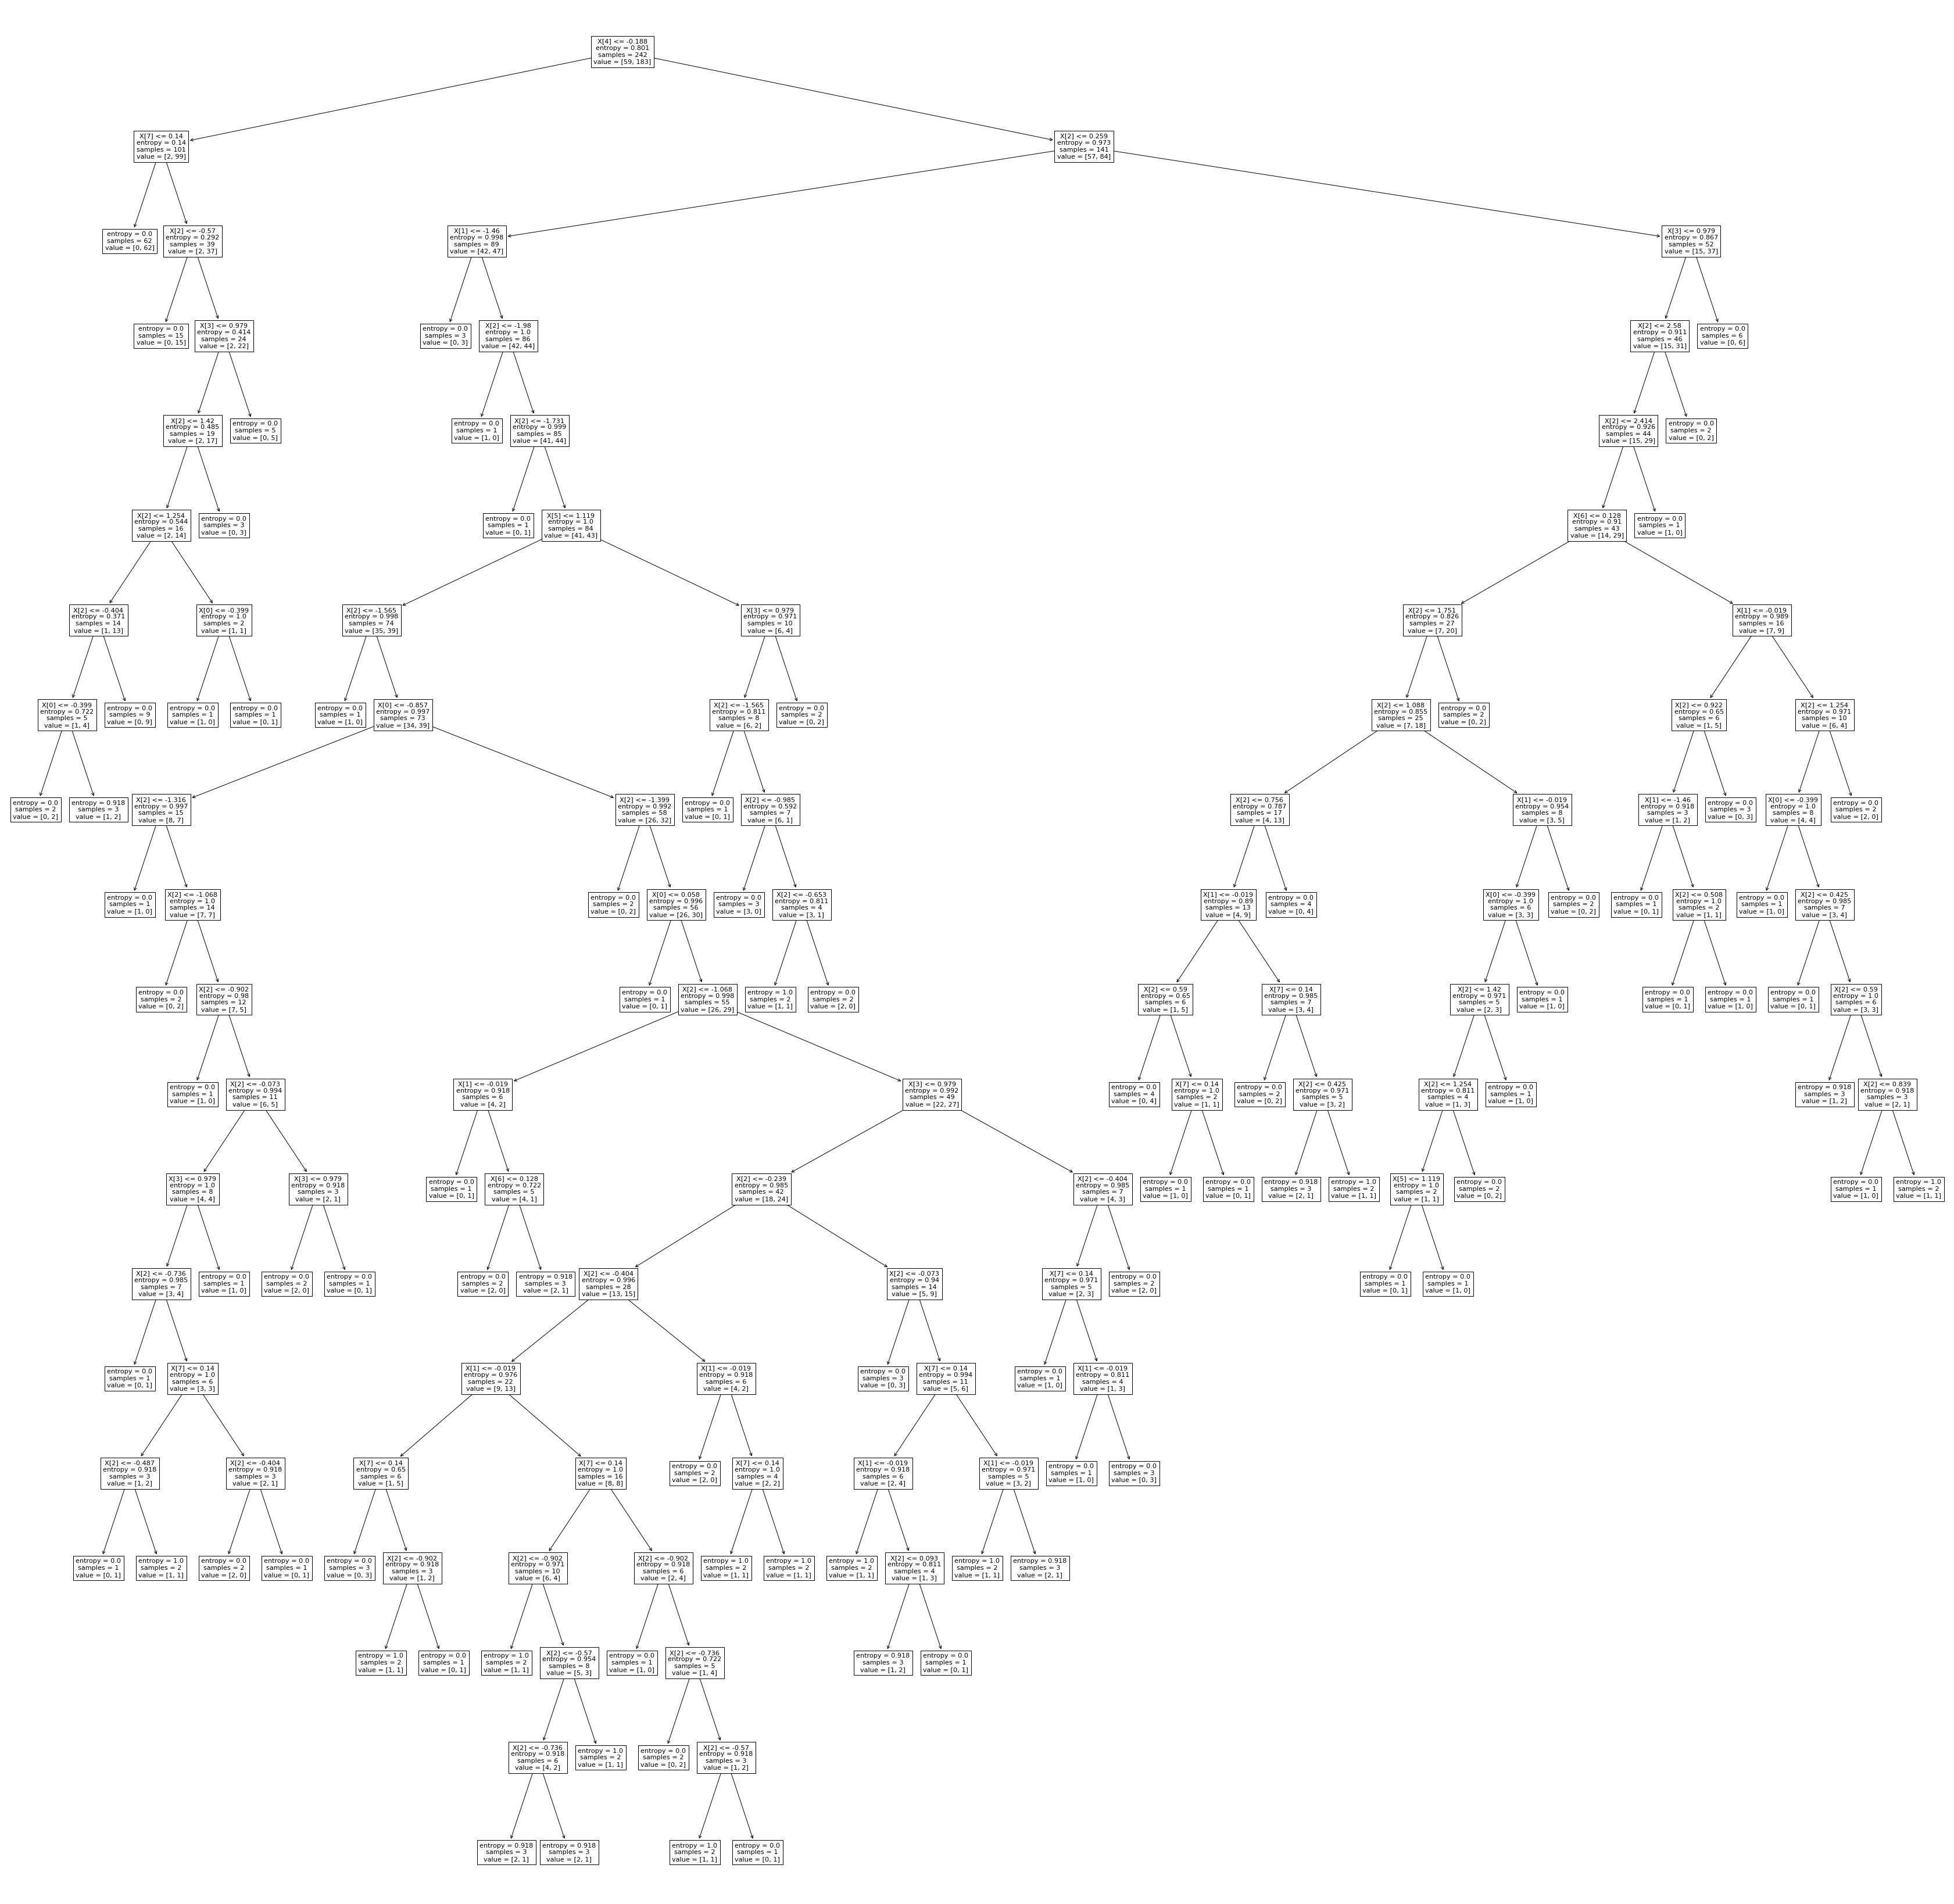

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score,f1_score

path = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"

df = pd.read_csv(path)

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature
Y = df['loan_status'].values

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 4, test_size = 0.3)

loan_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=20)
loan_tree.fit(X_train,Y_train)

pred = loan_tree.predict(X_test)

print("Jaccard Score 'COLLECTION' :",jaccard_score(Y_test,pred,pos_label='COLLECTION'))
print("Jaccard Score 'PAIDOFF'    :",jaccard_score(Y_test,pred,pos_label='PAIDOFF'))
print("F1 Score 'COLLECTION'      :",f1_score(Y_test,pred,pos_label='COLLECTION'))
print("F1 Score 'PAIDOFF'         :",f1_score(Y_test,pred,pos_label='PAIDOFF'))

print("\nOpen Tree in new tab to view more clearly :)")

plt.figure(figsize=(60,60))
tree.plot_tree(loan_tree)

# Support Vector Machine


In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,svm
from sklearn.metrics import jaccard_score,f1_score
from sklearn.model_selection import train_test_split

path = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"

df = pd.read_csv(path)

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature
Y = df['loan_status'].values

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=4,test_size=0.2)

sv = svm.SVC(kernel="rbf")
sv.fit(X_train,Y_train)

pred = sv.predict(X_test)

print("Jaccard Score 'COLLECTION' :",jaccard_score(Y_test,pred,pos_label='COLLECTION'))
print("Jaccard Score 'PAIDOFF'    :",jaccard_score(Y_test,pred,pos_label='PAIDOFF'))
print("F1 Score 'COLLECTION'      :",f1_score(Y_test,pred,pos_label='COLLECTION'))
print("F1 Score 'PAIDOFF'         :",f1_score(Y_test,pred,pos_label='PAIDOFF'))

Jaccard Score 'COLLECTION' : 0.18181818181818182
Jaccard Score 'PAIDOFF'    : 0.7272727272727273
F1 Score 'COLLECTION'      : 0.30769230769230765
F1 Score 'PAIDOFF'         : 0.8421052631578948


# Logistic Regression


In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score,f1_score,log_loss
from sklearn.model_selection import train_test_split

path = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"

df = pd.read_csv(path)

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature
Y = df['loan_status'].values

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=4,test_size=0.2)

LR = LogisticRegression(C=0.01,solver="liblinear").fit(X_train,Y_train)

pred = LR.predict(X_test)
pred_prob = LR.predict_proba(X_test)

print("Jaccard Score 'COLLECTION' :",jaccard_score(Y_test,pred,pos_label='COLLECTION'))
print("Jaccard Score 'PAIDOFF'    :",jaccard_score(Y_test,pred,pos_label='PAIDOFF'))
print("F1 Score 'COLLECTION'      :",f1_score(Y_test,pred,pos_label='COLLECTION'))
print("F1 Score 'PAIDOFF'         :",f1_score(Y_test,pred,pos_label='PAIDOFF'))
print("Log Loss                   :",log_loss(Y_test,pred_prob))

Jaccard Score 'COLLECTION' : 0.08333333333333333
Jaccard Score 'PAIDOFF'    : 0.6764705882352942
F1 Score 'COLLECTION'      : 0.15384615384615383
F1 Score 'PAIDOFF'         : 0.8070175438596492
Log Loss                   : 0.5772287609479654


# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [5]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

NameError: name 'pd' is not defined

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
